# Task 2.3: Fundementals of Visualization Libraries

## 2. Install and import libraries, and read in final dataset

In [1]:
#install matplotlib
%pip install matplotlib


  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 325.1 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 326.8 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 984.6 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 764.8 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-

In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib

In [4]:
# Beacuse I kept running into memory errors, I decided to sample the dataset to have randomly picked 10,000 rows so that I can continue with the exercise

In [2]:
#read csv file
df = pd.read_csv('NY_CitiBike_2022_sampled.csv', index_col = 0)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,_merge
29120623,3C8AACB2D6B4349A,classic_bike,2022-12-03 00:19:08,2022-12-03 00:40:57,Irving Ave & Jefferson St,5051.02,Market St & Henry St,5270.09,40.705410,-73.925450,40.713108,-73.994460,member,2022-12-03 00:19:08,2022-12-03,10.6,both
21568440,8891065C742A0959,classic_bike,2022-09-23 17:28:00,2022-09-23 17:42:12,W 36 St & 9 Ave,6569.07,W 12 St & Hudson St,5997.10,40.754623,-73.995170,40.737530,-74.005590,member,2022-09-23 17:28:00,2022-09-23,15.1,both
23553887,44C9E5C0CE745B83,classic_bike,2022-09-02 11:48:04,2022-09-02 11:55:42,Allen St & Rivington St,5414.06,Lafayette St & E 8 St,5788.13,40.720196,-73.989975,40.730206,-73.991030,member,2022-09-02 11:48:04,2022-09-02,21.7,both
21160236,621A040D1B1CD808,electric_bike,2022-09-28 16:41:53,2022-09-28 16:41:55,West St & Liberty St,5184.08,West St & Liberty St,5184.08,40.711445,-74.014850,40.711445,-74.014850,member,2022-09-28 16:41:53,2022-09-28,17.2,both
15027579,C06B5DF339C420E1,classic_bike,2022-07-28 06:08:22,2022-07-28 06:18:50,Lewis Ave & Kosciuszko St,4617.01,Hanson Pl & Ashland Pl,4395.07,40.692345,-73.937100,40.685066,-73.977905,casual,2022-07-28 06:08:22,2022-07-28,26.7,both


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [6]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_time             object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [7]:
df.shape

(10000, 17)

In [8]:
# I decided to drop the column '_merge' since it isn't necessary
df.drop(columns = {'_merge'}, inplace = True)

In [9]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp'],
      dtype='object')

## 3. Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe

In [10]:
#convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time                    object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [14]:
#set the 'date' column as the index
df_temp = df.set_index('date')

In [13]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp
date,,,,,,,,,,,,,,,
2022-12-03,3C8AACB2D6B4349A,classic_bike,2022-12-03 00:19:08,2022-12-03 00:40:57,Irving Ave & Jefferson St,5051.02,Market St & Henry St,5270.09,40.705410,-73.925450,40.713108,-73.994460,member,2022-12-03 00:19:08,10.6
2022-09-23,8891065C742A0959,classic_bike,2022-09-23 17:28:00,2022-09-23 17:42:12,W 36 St & 9 Ave,6569.07,W 12 St & Hudson St,5997.10,40.754623,-73.995170,40.737530,-74.005590,member,2022-09-23 17:28:00,15.1
2022-09-02,44C9E5C0CE745B83,classic_bike,2022-09-02 11:48:04,2022-09-02 11:55:42,Allen St & Rivington St,5414.06,Lafayette St & E 8 St,5788.13,40.720196,-73.989975,40.730206,-73.991030,member,2022-09-02 11:48:04,21.7
2022-09-28,621A040D1B1CD808,electric_bike,2022-09-28 16:41:53,2022-09-28 16:41:55,West St & Liberty St,5184.08,West St & Liberty St,5184.08,40.711445,-74.014850,40.711445,-74.014850,member,2022-09-28 16:41:53,17.2
2022-07-28,C06B5DF339C420E1,classic_bike,2022-07-28 06:08:22,2022-07-28 06:18:50,Lewis Ave & Kosciuszko St,4617.01,Hanson Pl & Ashland Pl,4395.07,40.692345,-73.937100,40.685066,-73.977905,casual,2022-07-28 06:08:22,26.7


In [15]:
#sort the index in ascending order
df_temp.sort_index(inplace=True)

In [16]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp
date,,,,,,,,,,,,,,,
2022-01-01,616121389EF49CD8,classic_bike,2022-01-01 12:48:27,2022-01-01 12:51:14,E 9 St & 5 Ave,5872.10,Lafayette St & E 8 St,5788.13,40.732758,-73.99582,40.730206,-73.991030,member,2022-01-01 12:48:27,11.6
2022-01-01,7F40DA212CABB2E2,electric_bike,2022-01-01 02:40:03,2022-01-01 03:12:18,Washington Square E,5755.09,Park Pl & Church St,5288.08,40.730495,-73.99572,40.713340,-74.009350,casual,2022-01-01 02:40:03,11.6
2022-01-01,8E5644A64F8323EC,electric_bike,2022-01-01 08:48:18,2022-01-01 09:01:37,W 22 St & 8 Ave,6224.03,Suffolk St & Stanton St,5445.02,40.744750,-73.99915,40.720665,-73.985176,member,2022-01-01 08:48:18,11.6
2022-01-01,77878288935BE4E2,electric_bike,2022-01-01 02:03:47,2022-01-01 02:16:22,Cathedral Pkwy & Broadway,7680.03,Lenox Ave & W 117 St,7655.22,40.804214,-73.96699,40.802555,-73.949080,casual,2022-01-01 02:03:47,11.6
2022-01-01,96FED67A07DDC7F9,electric_bike,2022-01-01 02:24:59,2022-01-01 02:29:19,5 Ave & E 63 St,6904.06,E 58 St & 1 Ave (NW Corner),6723.10,40.766370,-73.97152,40.759125,-73.962660,member,2022-01-01 02:24:59,11.6


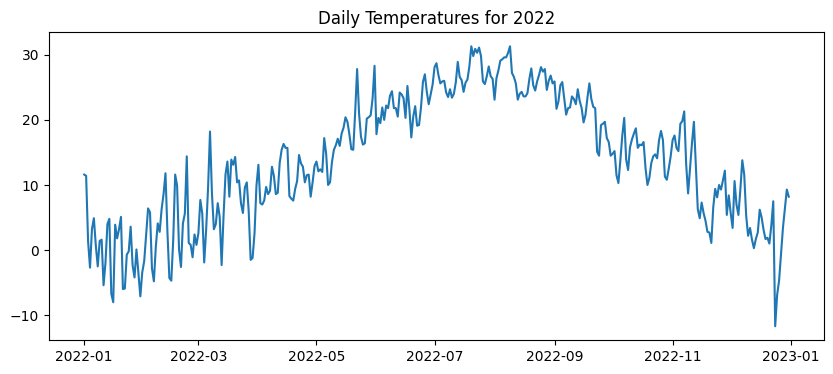

In [17]:
#Create the plot of average temperature by date 
plt.figure(figsize=(10,4))
plt.title('Daily Temperatures for 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

## 4. Create a column with the count of trips per day and merge it with the weather dataframe

In [18]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
df_group.head()

,date,ride_id
0,2022-01-01,6
1,2022-01-02,17
2,2022-01-03,10
3,2022-01-04,10
4,2022-01-05,11


In [20]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          10000
left_only         0
right_only        0
Name: count, dtype: int64
Shape of January 1st is (6, 18)
Shape of January 2nd is (17, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [22]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,2D6D0460016B4AAE,classic_bike,2022-01-01 17:55:38,2022-01-01 18:07:35,Mercer St & Bleecker St,5679.05,Bayard St & Baxter St,5351.03,40.727062,-73.99662,40.716022,-73.999740,member,2022-01-01 17:55:38,11.6,6,both
2022-01-01,8E5644A64F8323EC,electric_bike,2022-01-01 08:48:18,2022-01-01 09:01:37,W 22 St & 8 Ave,6224.03,Suffolk St & Stanton St,5445.02,40.744750,-73.99915,40.720665,-73.985176,member,2022-01-01 08:48:18,11.6,6,both
2022-01-01,77878288935BE4E2,electric_bike,2022-01-01 02:03:47,2022-01-01 02:16:22,Cathedral Pkwy & Broadway,7680.03,Lenox Ave & W 117 St,7655.22,40.804214,-73.96699,40.802555,-73.949080,casual,2022-01-01 02:03:47,11.6,6,both
2022-01-01,96FED67A07DDC7F9,electric_bike,2022-01-01 02:24:59,2022-01-01 02:29:19,5 Ave & E 63 St,6904.06,E 58 St & 1 Ave (NW Corner),6723.10,40.766370,-73.97152,40.759125,-73.962660,member,2022-01-01 02:24:59,11.6,6,both
2022-01-01,7F40DA212CABB2E2,electric_bike,2022-01-01 02:40:03,2022-01-01 03:12:18,Washington Square E,5755.09,Park Pl & Church St,5288.08,40.730495,-73.99572,40.713340,-74.009350,casual,2022-01-01 02:40:03,11.6,6,both


## 5. Create a line chart with the count of trips per day and merge it with the weather dataframe

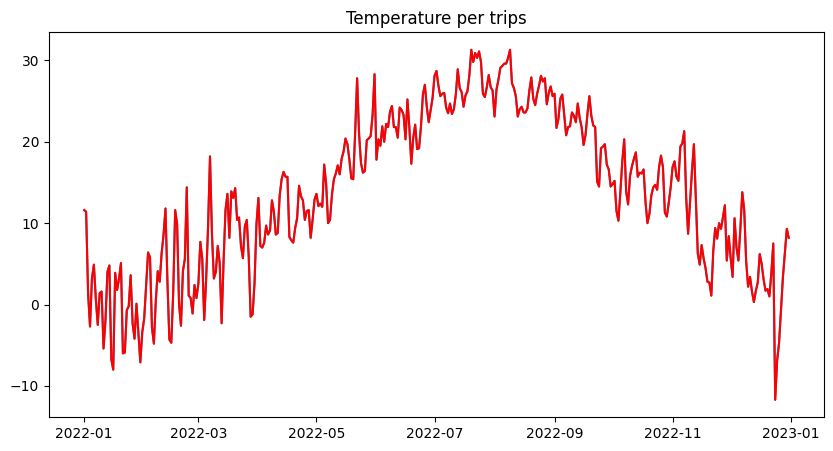

In [23]:
#In this step, I decided to change the color of the chart to red

plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['avgTemp'], color = 'red')
plt.show()

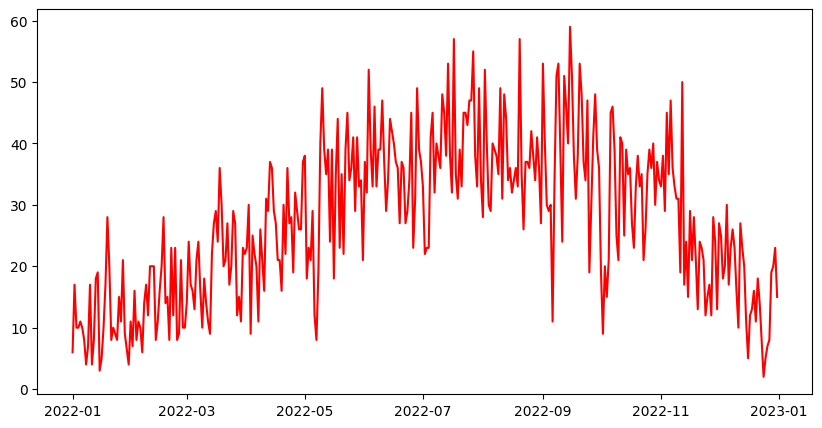

In [25]:
#In the step, I went with a object_oriented approach using the 'ax' object. 

# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

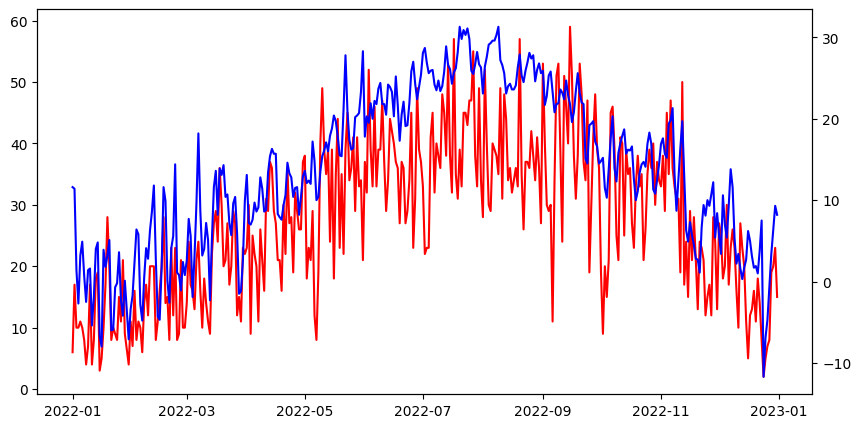

In [26]:
# In this step, I created a chart that is a combo of the bike rides (the red chart)  chart and the temperature chart (the blue chart) by using dual axis combo.

# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

### Clean the chart by adding axis titles and the colors

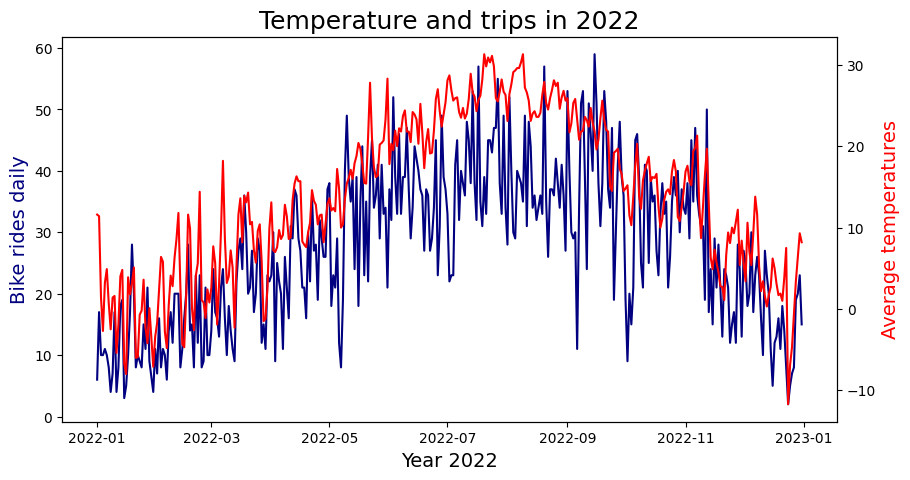

In [27]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### Creating Two plots in the same figure

In [28]:
plt.style.use('ggplot')

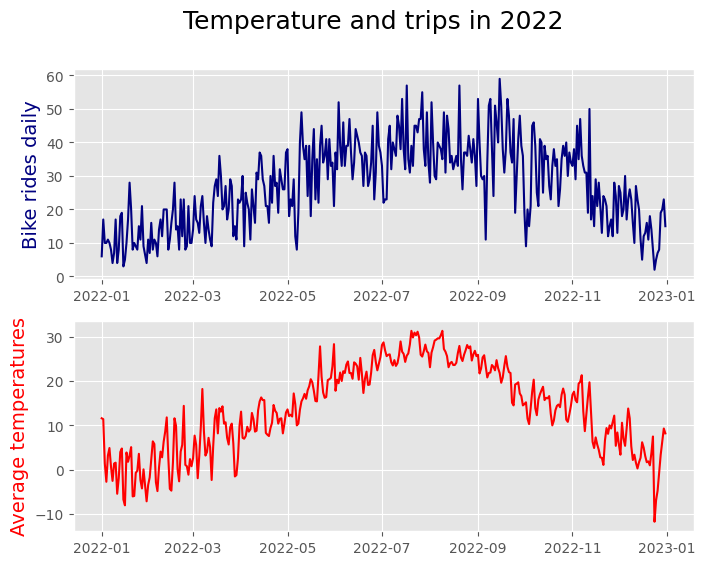

In [29]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

## 6. Brifely explain your codes; how did you use Matplotlib to achieve this? what paradigm did you use? 

### Through the use of Matplotlib, I created a line chart that shows only the daily temperatures for 2022. I defined the figure size, title, and color of the chart. Then, I created another line chart through an object-oriented approach. After that, I created a dual axis to show the temperature (red) and bike rides (blue), I used the "twinx()" function to put the axes in the same plot. Then, I cleaned up the chart to make it more neater by adding color codded axis titles. Finally, I created two stacked line charts by using the argument 'subplots()' to create two frames and then specified what data to use by using ax[0] first and ax[1] second. 